# Session 8 Exercises

These are the exercises from the Session 8 notes.

In [3]:
# We always start with appropriate imports; note the use of the IPython magic
# command to set up Matplotlib within the notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Create a random number generator using the appropriate command in the notes
# Below, I assume that you have called it rng

## 3. Pseudo-random numbers

### In-class exercises

1. One isotope of thallium ($^{208}$ Tl) has a half-life t $_{1/2}$=3.053 minutes, decaying to $^{208}$ Pb. You will write a simple for loop using pseudo-random numbers to track the populations of $^{208}$ Tl and $^{208}$ Pb in a sample over 1,000 seconds, starting with 1,000 atoms of $^{208}$ Tl and 0 atoms of $^{208}$ Pb.

   The probability of decay in a time interval dt is $p=1-e^{-dt/\lambda}$ where $\lambda=t_{1/2}$/log2. Set dt=1, and at each step, evaluate the probability that each $^{208}$ Tl atom decays by creating an array of random numbers from 0 to 1 whose length is the number of $^{208}$ Tl atoms (use `rng.random`). For each atom, it will decay if the random number generated, $n<p$. You’ll need to have two arrays to store the populations for Tl and Pb atoms at each step.  (Use `np.where` as described in the notes.)
 
   At each timestep, sum over the number of atoms that do decay (using `np.sum` on the result of the `np.where` call), and use this number to update the total number of thallium and lead atoms. Make a plot of the number of atoms of each species against time.

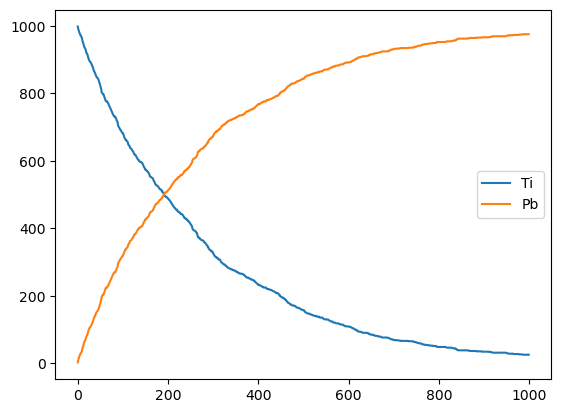

In [4]:
rng = np.random.default_rng()

n_Ti = 1000
n_Pb = 0

Ti_plot = np.zeros(1000)
Pb_plot = np.zeros(1000)

arr = rng.random(n_Ti)

dt = 1
l = 3.053*60/np.log(2)
p = 1 - np.exp(-dt/l)

for t in range(1000):
    n_decay = np.sum(np.where(arr < p, 1, 0))
    n_Ti -= n_decay
    n_Pb += n_decay

    Ti_plot[t] = n_Ti
    Pb_plot[t] = n_Pb
    arr = rng.random(n_Ti)
    
plt.plot(Ti_plot, label='Ti')
plt.plot(Pb_plot, label='Pb')
plt.legend()

2. We will model a random walk on a square 2D lattice (this will be a random motion between points on the lattice). Define a size (a side length for the square) and create a two-dimensional array to store the number of times each point has been visited (initialise to zero).

   Define an array that can be used to check possible neighbours of any given point, using something like `np.array([[-1,0],[1,0],[0,-1],[0,1]])` (be sure that you understand what we are doing, and feel free to use your own implementation).

   Define a number of steps, setting it to 1,000 to start, and create an array to store the overall trajectory (it will need to store the coordinate of the current location at each timestep, so will need dimension $N_{steps} \times 2$). Now, starting at the middle of the lattice, loop over the number of steps and at each step pick a neighbouring point at random and move there (I used `rng.integers(0,4)` to pick a random integer from 0 to 3).

   Impose hard-wall boundaries: if `x<0` then add two (`x += 2`) and if `x>L` then subtract two (`x -= 2`); do the same for y. Update the position and store it in the trajectory array, then update the 2D array that stores the number of times each point has been visited. You can visualise the random walk using `plt.imshow` for the visits and `plt.plot` for the trajectory. The probability of reaching a certain distance after N steps is given by $P(r)=2re^{-r^2/N}/N$; if you wanted, you could show this as an image on the same graph as the trajectory (using `np.meshgrid` to generate `x` and `y` variables).

### Further work

1. Make a new piece of code to explore the decay chain $^{218}\mathrm{Po} \rightarrow  ^{214}\mathrm{Pb} \rightarrow  ^{214}\mathrm{Bi} \rightarrow  ^{210}\mathrm{Pb}$ with half lives of 3.1 minutes, 26.8 minutes, 19.9 minutes for the first three nuclei (the final is stable). Use the same approach as before, but you will need to be careful about the order in which you calculate decays: start with the final decay and work back along the chain (remember that `range(3,-1,-1)` will produce 3, 2, 1, 0). You will need at least 6,000 seconds. Plot the populations, and ensure that the total number of atoms is conserved.

2.	Extend the random walk to three dimensions (you will need six neighbours). I found that a 3D projection using `ax.plot` worked well to visualise the trajectory.

## 4. Probability distributions

### In-class exercises

1. In the first two questions, you will test an implementation of the central limit theorem. Write a function that takes three parameters as input: `Nsamp`, the number of samples to use for each variable; `mu`, the mean of the expected normal distribution; and `sigma`, the width of the expected normal distribution.  The function should return the mean of `Nsamp` uniformly selected random numbers in the range: $\mu-\sqrt{3N_{samp}} \sigma \rightarrow \mu + \sqrt{3N_{samp}} \sigma$.

In [11]:
def CLT(Nsamp, mu, sigma):
    
    return np.mean((mu+2*sigma*np.sqrt(3*Nsamp))*rng.random(Nsamp))

2. Now you will test the central limit theorem: make `Ndist` calls to your function (vary `Ndist` from $10^3$ to $10^6$, say) using $\mu=0.0$ and $\sigma=1.0$ and store them in a table. Plot a histogram using `plt.hist` and set the parameter bins appropriately; add the parameter `density=True`. Plot a Gaussian on the same graph to check your function (the appropriate Gaussian is $e^{-x^2/2\sigma^2}/\sqrt{2\pi\sigma^2}$). Experiment with `Nsamp` between 2 and 20 (say), and see how many samples are needed to generate a good match.  Make sure that you understand the difference between the numbers `Ndist` and `Nsamp`.

(array([997.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([0.        , 0.03989423, 0.07978846, 0.11968268, 0.15957691,
        0.19947114, 0.23936537, 0.2792596 , 0.31915382, 0.35904805,
        0.39894228]),
 <BarContainer object of 10 artists>)

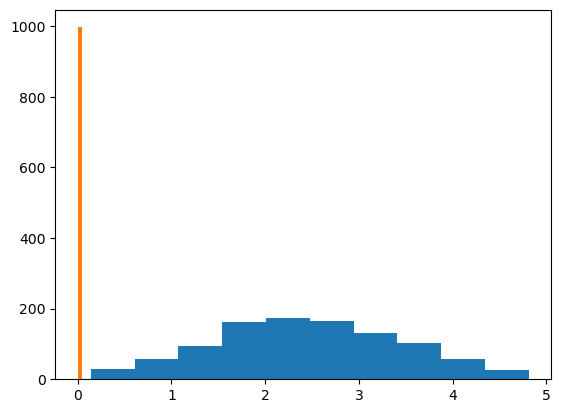

In [18]:
Nsamp = 2
Ndist = int(1e3)
mu = 0.0
sigma = 1.0

store = np.zeros(Ndist)
gaussian = np.zeros(Ndist)

for i in range(Ndist):
    store[i] = CLT(Nsamp, mu, sigma)
    gaussian[i] = np.exp(-i**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)

plt.hist(store)
plt.hist(gaussian)

3. Write a function to implement the rejection method where $p(x)$ is uniform (a rectangle, in effect), and $q(x)=(1+x^2)e^{-x^2/2}/\sqrt{8\pi}$. Ensure that $p(x)$ is scaled so that the height of the rectangle is larger than the maximum value of $q(x)$ (around 0.25) and draw samples from $-5\le x\lt5$ (note that $p(x)$ is not normalised). You will need something like a `while` loop to implement steps 1–5 of the rejection method described above (you will need to iterate while $n_i>q(x_i)$, choosing a new x at each step). Your function should take parameters describing the limits of the rectangle and its height (I called them a, b, h) and a number of samples, `Nsamp`. It should return an array of `Nsamp` numbers. You should write out how many total tests are made, along with the number of successful samples.

4. Now test this for $10^5$ samples, and plot a histogram of the distribution, along with a plot of the target distribution ($q(x)$ above). How accurate and efficient is the method?

### Further work

1. Using the transformation method, we can show that a Poisson distribution such as radioactive decay can be generated from a uniform random distribution x by using $y=-\lambda\log(1-x)$. Use this to generate the lifetimes of 1,000 Tl atoms (you will need 1,000 random numbers). Now sort these lifetimes (`np.sort` will return a sorted array) and write a `for` loop over time from $1\rightarrow t_{max}$s, where $t_{max}$ is the maximum lifetime, at each step counting the number of Tl atoms that have decayed (i.e. how much further along the sorted array you need to go to exceed the present time). Store the number of Tl and Pb atoms, as before, and plot against time. Notice how we generate the complete decay history in about half the time.

2. Write a function to implement the rejection method for the same function in the in-class exercises, but using $p(x)=Ae^{-x^2/2\sigma^2}/\sqrt{2\pi\sigma^2}$. Set $A=1.5$ to ensure that $q(x)$ is completely enclosed.

3.	Test again, and compare the accuracy and efficiency to the case using the uniform distribution.

## 5. Monte Carlo integration

### In-class exercises

We will use the Monte Carlo method to evaluate the integral:

$$I=\int_0^1 x^{-1/3} + \frac{x}{10} dx$$

1. Write a (very simple) function to calculate the value of the integrand for an input parameter `x`. (The integrand is $x^{-1/3}+x/10$.)

In [21]:
def integral(x):
    return x**(2/3) * 3/2 + x**2/5

val = integral(1) - integral(0)
print(val)

1.7


2. Use Monte Carlo integration to evaluate the integral between 0 and 1 using different numbers of samples (between $10^3$ and $10^6$). For each sample, choose $x$ from a uniform distribution between 0 and 1, evaluate the integrand, and add to the total. You then need to scale the total by $1/N_{samp}$ (in this case: the domain is in one dimension and has length 1). Compare your answers to the analytic result: 1.55.

3. Now use importance sampling: draw a variable $y$ uniformly from 0 to 1, then find $x=y^{3/2}$ and use $p(x)=2x^{-1/3}/3$ to give an improved estimate of the integral for a given number of samples. Alter your code above to use this, and investigate the number of samples needed to converge.

### Further work

1. The equation of an ellipse is $x^2/a^2+y^2/b^2=1$, and the corresponding area is $A=\pi ab$. Use the Monte Carlo integration technique in 2D to evaluate the area of an ellipse by drawing samples uniformly from (a) a square that encloses the ellipse and (b) a rectangle that encloses the ellipse. Note that in this case you will need to use the pre-factor $A/N_{samp}$ where $A$ is the area of the shape enclosing the ellipse.  Which is more efficient?

## 6. Monte Carlo simulation

### In-class exercises

1.	Define a box length (set it to 50 for now), and create variables `B_over_kT = 0.4` and `J_over_kT = 0.0`. (Notice that we are using the temperature to set an energy scale.) Create an initial lattice of spins using the command:

 	`spins = (-1)**rng.integers(0,2,size=(boxlen,boxlen))`

    Notice that the `rng.integers` command will return a two dimensional array of numbers which are either 0 or 1; using this as the exponent gives us 1 or -1.  Plot your array using `plt.imshow` to ensure that it is correct—you should see something like the figure in the notes.

In [22]:
B_over_kT = 0.4
J_over_kT = 0.0 





2. Use `np.roll` to create an array which holds the sum over all neighbouring spins for every spin on the lattice: `sum_neigh = np.roll(spins,1,axis=0) + `... (this will form part of the $s_i s_j$ term in the energy). You can use this to evaluate the total energy using:

	`etot = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh))`

    Check that you understand why this is equivalent to the equation for total energy above.

3.	Write a function to perform a trial update on the spin array. It should take the location of the spin as an input parameter, evaluate the energy change if the spin flips (you should calculate the positions of the neighbouring spins modulo boxlen) and accept it (change the sign of the spin) according to the criteria given in the algorithm above.

4.	Now perform a 50,000 step Monte Carlo simulation. At each step, choose a lattice point at random and call your update function. Keep a record of the overall total energy, mean spin and the square of the mean spin. Every 5,000 steps (or more often if you want) plot the sample, using subplots (`fig = plt.figure(); ax = fig.add_subplot(3,4,index); ax.imshow()` or similar).

5.	Plot the long-range order (average spin at each step) over time and, on a separate plot, the energy. You could also calculate the overall average spin and standard deviation.

### Further work

1. Run another Monte Carlo simulation, this time for a box length of 100, setting `B_over_kT` to zero, and experimenting with values of `J_over_kT` between 0.1 and 2. You should find a phase transition when $J/k_B T\gt 0.46$ with domains of parallel spin emerging in the domain.

2. Implement a simple simulated annealing process to find the minimum of the function $f(x)=0.001x^2+cos(x)e^{0.1(x-x^2)}$. Define a starting temperature $T=100$, and starting position $x=-5$. Perform a double loop: for each value of temperature, repeat 1,000 times a Monte Carlo trial where you change $x$ by a value drawn randomly from -1 to 1 (accept with the usual criteria); then scale the temperature by 0.9 and repeat. Continue until the temperature is less than 0.01, and output the location and value of the minimum. Test the effect of changing the starting temperature and starting point.